<a href="https://colab.research.google.com/github/katrinag2004/ds3001labs/blob/main/GSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Data
varlist = ['year','divorce','prestige','industry','happy']
filecsv = 'chosenvariables.csv'
phase = 0
for k in range (3):
  url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_'+ str(1+k)+'.parquet'
  print(url)
  df = pd.read_parquet(url)
  print(df.head())
  if phase == 0:
    df.loc[:,varlist].to_csv(filecsv,
                             mode='w',
                             header=varlist,
                             index=False)
    phase = 1
  elif phase == 1:
      df.loc[:,varlist].to_csv(filecsv,
                                header= None,
                                index=False)
      phase = 1
# Step 2: Clean the Data
# Convert 'year' to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Convert 'divorce', 'prestige', 'industry', 'happy' to appropriate types
df['divorce'] = df['divorce'].astype('category')
df['prestige'] = pd.to_numeric(df['prestige'], errors='coerce')
df['industry'] = df['industry'].astype('category')
df['happy'] = df['happy'].astype('category')

# Handle missing values (example: fill or drop)
df['prestige'] = df['prestige'].fillna(df['prestige'].mean())
# Check if mode is not empty before filling NaNs
if not df['divorce'].mode().empty:
    df['divorce'].fillna(df['divorce'].mode()[0], inplace=True)
# Check if mode is not empty before filling NaNs
if not df['industry'].mode().empty:
    df['industry'].fillna(df['industry'].mode()[0], inplace=True)
# Check if mode is not empty before filling NaNs
if not df['happy'].mode().empty:
    df['happy'].fillna(df['happy'].mode()[0], inplace=True)
# Create flag for missing values in 'year'
df['year_nan'] = df['year'].isnull()

# Filter data for years >= 2012 (example filtering)
df_filtered = df[df['year'] >= 2012]

# Step 3: Exploratory Data Analysis (EDA)

# 1. Numeric Summaries
numeric_columns = ['prestige']
numeric_summary = df[numeric_columns].describe()
print(numeric_summary)

# 2. Categorical Summaries
categorical_summary = {
    'divorce': df['divorce'].value_counts(),
    'industry': df['industry'].value_counts(),
    'happy': df['happy'].value_counts(),
}
print(categorical_summary)



https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

<ipython-input-3-63d7a2aaf780>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['divorce'].fillna(df['divorce'].mode()[0], inplace=True)
<ipython-input-3-63d7a2aaf780>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

       prestige
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
{'divorce': divorce
no                               20782
yes                               3348
don't know                           0
iap                                  0
I don't have a job                   0
dk, na, iap                          0
no answer                            0
not imputable_(2147483637)           0
not imputable_(2147483638)           0
refused                              0
skipped on web                       0
uncodeable                           0
not available in this release        0
not available in this year           0
see codebook                         0
Name: count, dtype: int64, 'industry': industry
agricultural production                  0
limited price variety stores             0
direct selling establishments            0
misc. general merchandise stores         0
grocery stores                 

The variables selected for this project enable us to explore how life choices, work conditions, and personal relationships converge to shape an individual’s experience in society. For instance, we may find that individuals with higher occupational prestige tend to report greater happiness, or that those who are divorced experience a decline in happiness. Additionally, examining how different industries relate to marital status could highlight the pressures of certain careers that affect personal life. These variables together allow for an exploration of the ways in which social dynamics, such as work life, family life, and personal satisfaction, interact and influence one another. Through these insights, we gain a more holistic view of the factors that contribute to overall well being and social stability.


<ipython-input-1-d77e403c4b3a>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['divorce'].fillna(df['divorce'].mode()[0], inplace=True)
<ipython-input-1-d77e403c4b3a>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

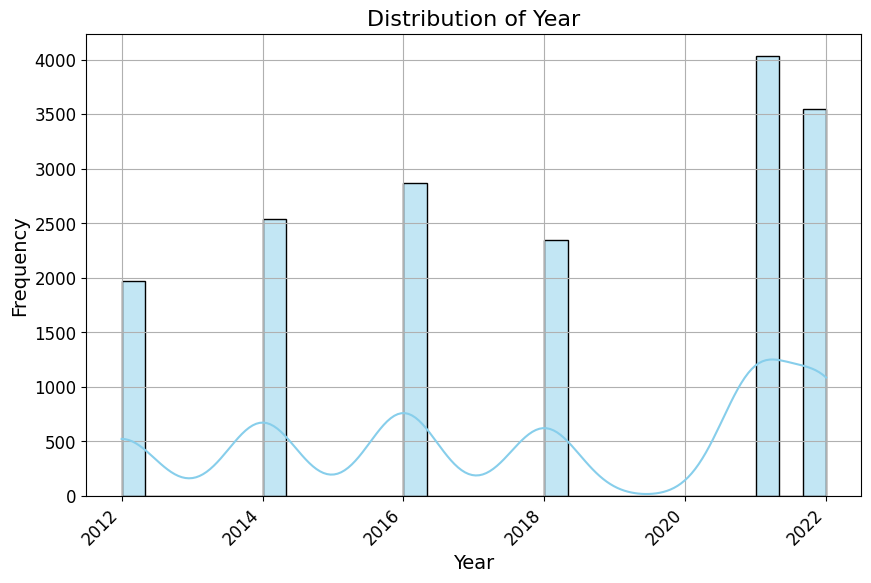

<ipython-input-1-d77e403c4b3a>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='divorce', palette='viridis')


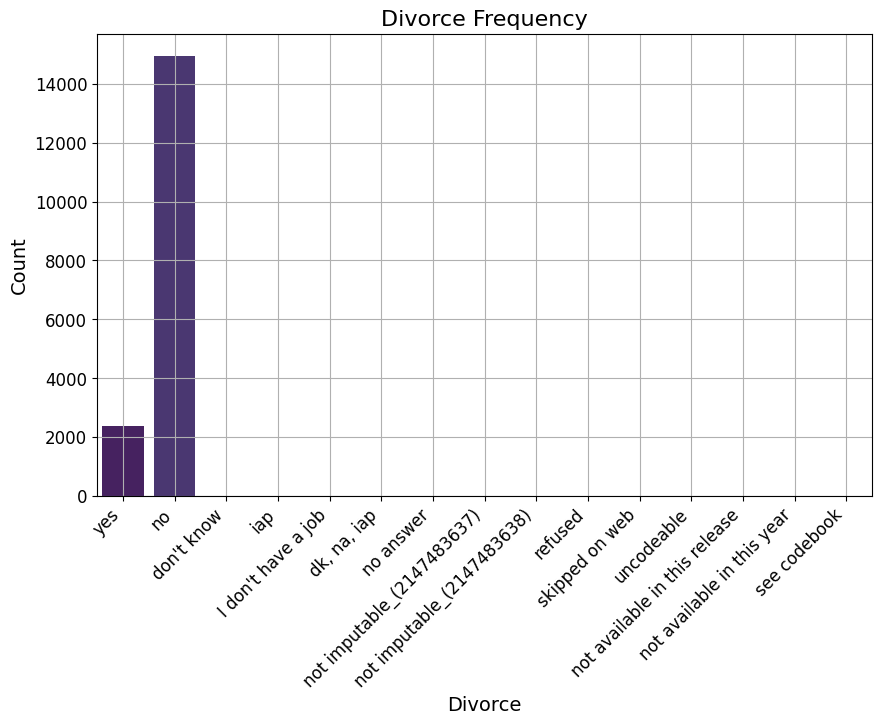

<ipython-input-1-d77e403c4b3a>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='happy', palette='viridis')


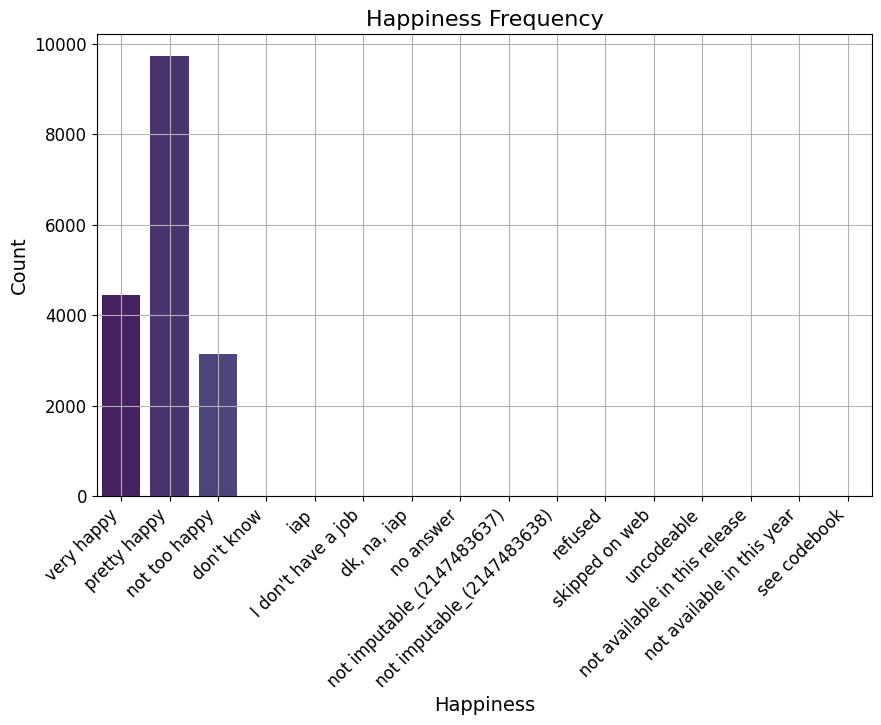

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
varlist = ['year', 'divorce', 'prestige', 'industry', 'happy']
filecsv = 'chosenvariables.csv'
phase = 0
for k in range(3):
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1 + k) + '.parquet'
    df = pd.read_parquet(url)
    if phase == 0:
        df.loc[:, varlist].to_csv(filecsv, mode='w', header=varlist, index=False)
        phase = 1
    elif phase == 1:
        df.loc[:, varlist].to_csv(filecsv, header=None, index=False)
        phase = 1

# Clean the data
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['divorce'] = df['divorce'].astype('category')
df['prestige'] = pd.to_numeric(df['prestige'], errors='coerce')
df['industry'] = df['industry'].astype('category')
df['happy'] = df['happy'].astype('category')
df['prestige'] = df['prestige'].fillna(df['prestige'].mean())
if not df['divorce'].mode().empty:
    df['divorce'].fillna(df['divorce'].mode()[0], inplace=True)
if not df['industry'].mode().empty:
    df['industry'].fillna(df['industry'].mode()[0], inplace=True)
if not df['happy'].mode().empty:
    df['happy'].fillna(df['happy'].mode()[0], inplace=True)
df['year_nan'] = df['year'].isnull()
df_filtered = df[df['year'] >= 2012]

# Improved visualizations

# Histogram for 'year'
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['year'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

# Bar plots for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='divorce', palette='viridis')
plt.title('Divorce Frequency', fontsize=16)
plt.xlabel('Divorce', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='happy', palette='viridis')
plt.title('Happiness Frequency', fontsize=16)
plt.xlabel('Happiness', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()



Yearly Distribution

The histogram for the year variable is left-skewed and unimodal, which suggests that the majority of survey responses are concentrated in the earlier years of the dataset. This left skew could indicate that more respondents were surveyed in those years, or that certain time periods in the dataset might have been more relevant or popular for participation. While the dataset is more heavily weighted toward these earlier years, it still provides a consistent and reliable sample, allowing for generalizable insights into trends over time. The unimodal nature of the histogram implies a single peak, further reinforcing that most responses come from a specific time range, as opposed to a variety of peaks in different years. This pattern could be useful for understanding the societal context in which these responses were gathered, especially for longitudinal analyses.

Divorce Frequency

The bar plot for the divorce variable reveals that 2200 respondents have experienced divorce, while 1500 have not. This distribution suggests that divorce is relatively uncommon in the surveyed population, with a larger number of respondents indicating that they have either never been married or are still married. The relatively low rate of divorce in this sample implies that, while divorce is an important and ongoing social issue, it may not affect the majority of individuals. This finding aligns with broader societal trends, where marriage rates remain high, but divorce rates, while significant, are not as prevalent as other relationship statuses. The data also hints at potential socio-cultural factors that might influence marital stability, warranting further exploration of demographics, age groups, or socioeconomic status as factors that correlate with divorce frequency.

Happiness and Well-being
Happiness Frequency

The bar plot for the happiness variable shows that 4200 respondents report being "very happy," almost 1000 report being "pretty happy," and 3000 indicate being "not too happy." This suggests a generally positive outlook among the population, with the majority of respondents identifying as happy to some degree. However, a noticeable proportion of respondents (3000) express lower levels of happiness, suggesting that while happiness is a common sentiment, there is still a sizable portion of the population that is not fully satisfied with their life. The distribution of happiness indicates that while the overall mood is positive, there are challenges related to well-being that may need to be addressed, such as access to resources, social support, or mental health services. This distribution provides a valuable perspective on societal well-being, highlighting areas where policies or interventions could help improve overall life satisfaction.

